In [1]:
library(tidyverse)
library(readxl)
library(lubridate)

# set theme for plotting

# Set font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIG_SIZE = 12

# SMALL_SIZE = 6
# MEDIUM_SIZE = 7
# BIG_SIZE = 8

theme_custom <- theme_bw() +
  theme(
    text = element_text(family = "Helvetica", size = BIG_SIZE),
    axis.title = element_text(size = BIG_SIZE),
    axis.text = element_text(size = BIG_SIZE),
    axis.ticks = element_line(size = 0.05),
    axis.ticks.length = unit(0.05, 'cm'),
#     legend.position = 'right',
#     legend.spacing.y = unit(0.01, 'cm'),
#     legend.box = 'horizontal',
#     legend.box.just = 'left',
#     legend.text = element_text(size = SMALL_SIZE),
#     legend.title = element_text(size = SMALL_SIZE),
#     legend.margin = margin(t = 0, unit='cm'),
    axis.line = element_line(size = 0.1),
    strip.text.x = element_text(size = SMALL_SIZE)
  )

# options(repr.plot.width=20, repr.plot.height=5)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts -------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [42]:
10.69340436/0.2728471828

[1] 39.19192

In [24]:
df

mutant,mean_kcat,kcat_se,mean_Km,Km_se,mean_kcat_Km,se
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F159L,9.114938,1.3121539,0.21566538,0.06583804,44.559616,7.5188887
F159W,12.194720,8.5114091,5.26411408,3.78409341,2.388556,0.1001328
F163L,5.610758,1.0637660,0.17724560,0.05433110,32.907605,4.0855190
F28V,4.228001,0.9689128,0.07918968,0.07351692,304.273725,270.2417055
F28Y,6.367021,1.8308649,0.14880516,0.06738507,46.816381,8.8966013
F54A,12.619024,1.6376113,0.24806541,0.05751508,52.142129,5.4878566
F54K,13.518026,3.1104484,0.28281945,0.04504452,47.244156,3.4734449
F54W,14.648773,3.2075299,0.50129082,0.09882479,29.091310,0.6634617
G35A,31.508090,0.8867615,0.89668921,0.08232533,35.345388,2.2561433


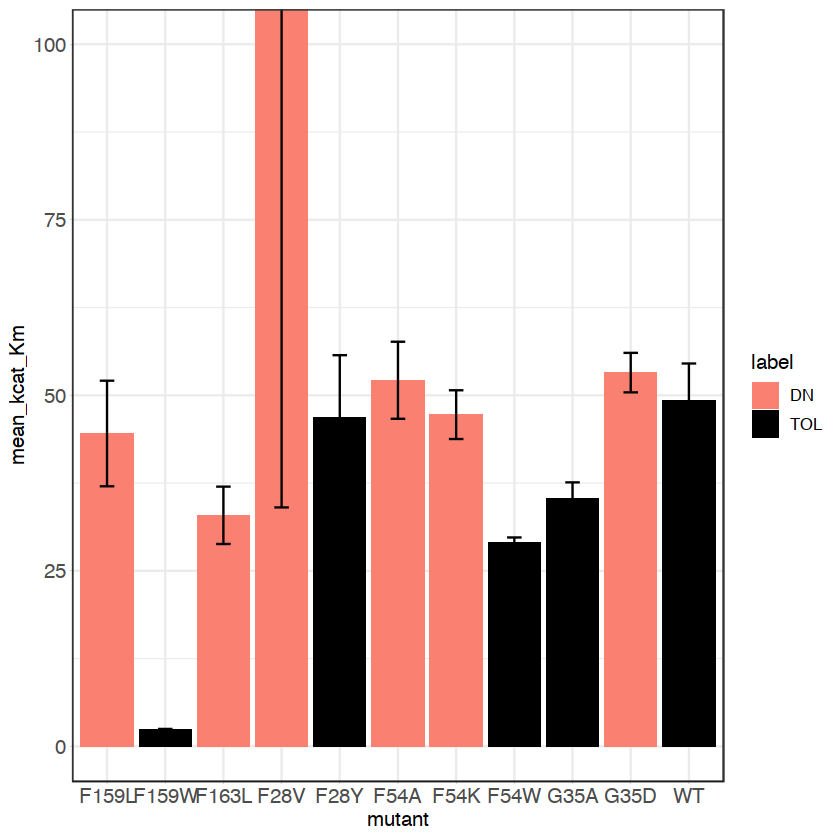

In [23]:
domnegs = c('F28V','H32D','H32I','G35D','H50N','P51A',
            'P51E','F54A','F54K','N156A','F159L','F163L')
tolerant = c('F28Y','H32L','H32E','G35A','H50R','P51G',
             'F54W','N156W','F159W','F163Y')


# read in GAP data
df <- read_delim('GAP_computed_kcat_Km/GAP_table_raw.txt', delim='\t', col_types=cols())
WT <- filter(df, mutant=='WT')

df %>% 
    mutate('label' = ifelse(mutant %in% domnegs, 'DN', 'TOL')) %>% 
    ggplot(aes(mutant, mean_kcat_Km, fill=label)) +
    geom_bar(stat='identity') +
    geom_errorbar(aes(ymin = mean_kcat_Km - se, ymax =  mean_kcat_Km + se), width = 0.25) +
    scale_fill_manual(values = c('salmon','black')) +
    theme_custom +
    coord_cartesian(ylim = c(0, 100))

Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 1 rows containing missing values (geom_text)."


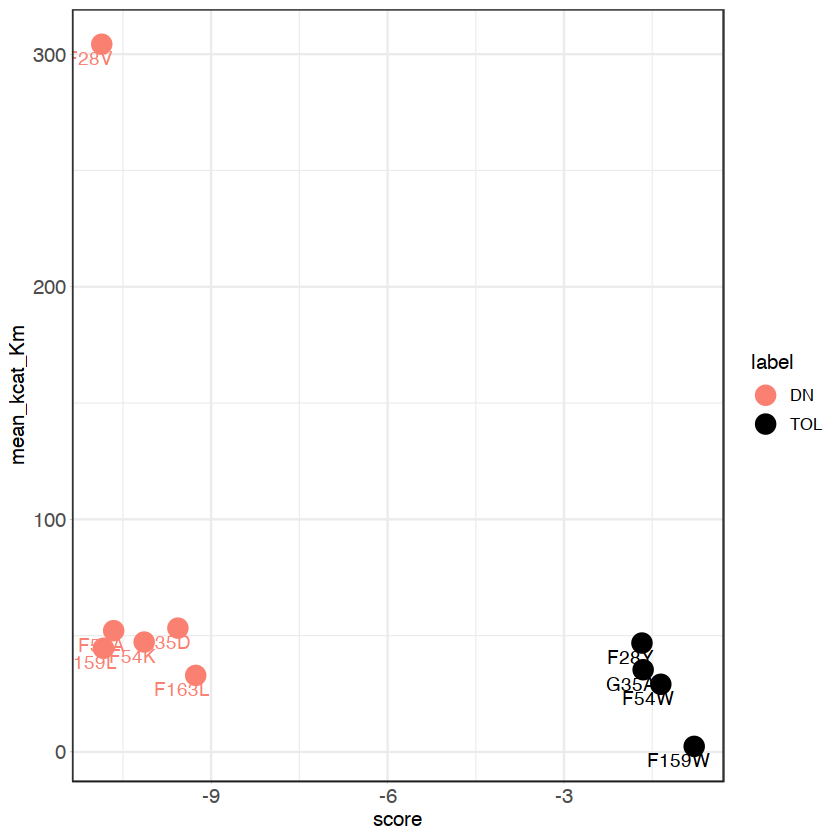

In [46]:
df_fit6 <- read_csv('../../../Data/6gen_fitness_current.csv', col_types=cols()) %>% 
    select(mutant, score)


df %>% 
    mutate('label' = ifelse(mutant %in% domnegs, 'DN', 'TOL')) %>% 
    left_join(df_fit6, by='mutant') %>% 
    ggplot(aes(score, mean_kcat_Km, color=label)) +
    geom_point(size=5) +
    geom_text(aes(label=mutant), hjust=0.75, vjust=1.5) +
    scale_color_manual(values = c('salmon','black')) +
    theme_custom